<h1> Amostragem e Conversão Analógico-Digital </h1>

<h2> 1. Amostragem e Interpolação Ideal </h2>

Como vimos na análise teórica, o sinal idealmente amostrado $\overline{x}(t)$ consiste em uma sequência de impulsos equiespaçados em tempo de $T$ segundos, ou seja:

$$
    \overline{x}(t) = \sum_{n=-\infty}^\infty x(nT) \delta (t - nT)
$$

Deduzimos que o espectro do sinal amostrado consiste em réplicas periódicas a cada $\omega_s$ rad/s do espectro do sinal $x(t)$, ou seja:

$$
    \overline{X}(\omega) = \frac{1}{T}\sum_{k=-\infty}^\infty X(\omega - k\omega_s)
$$

Se desejamos reconstruir $x(t)$ a partir de suas amostras $\overline{x}(t)$, podemos recuperar $X(\omega)$ a partir de $\overline{X}(\omega)$. Isso é possível se não houver sobreposição dos ciclos de $\overline{X}(\omega)$. Para que isso aconteça, basta que:

$$
    f_s \geq 2B
$$

ou de forma equivalente:

$$
    T \leq \frac{1}{2B}
$$

Esse teorema é conhecido como Teorema de Shannon-Nyquist ou Teorema da Amostragem.

Recupera-se o sinal $x(t)$ a partir de $\overline{x}(t)$ filtrando-se o espectro de $\overline{X}(\omega)$ por um filtro passa-baixas com frequência de corte $f_c = B$ Hz ($\omega_c = 2\pi B$) e ganho $T$.

Para ilustrar esse processo, considere a amostragem do seguinte sinal:

$$
g(t) = \sin (2\pi \cdot 3 \cdot t) - \sin (2\pi \cdot 5 \cdot t)
$$

A frequência máxima do sinal é $B = 5$ Hz. Utilizaremos a frequência de amostragem de $f_s = 50$ Hz.

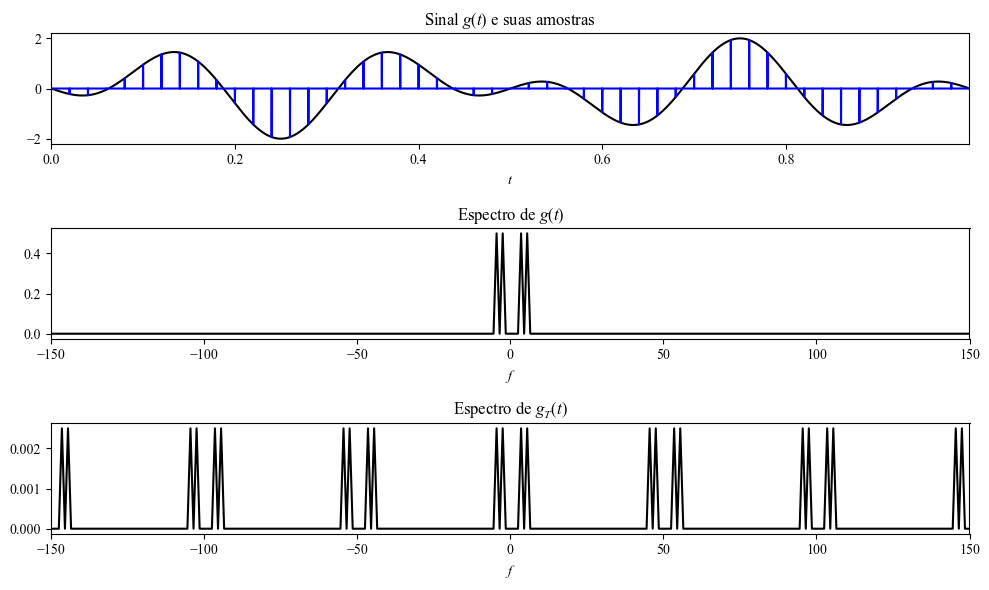

In [2]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt
#Muda a fonte dos Plots para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

Td = 1e-4
t = np.arange(0,1.0,Td)
g = np.sin(2*np.pi*3*t) - np.sin(2*np.pi*5*t)
f,Gf = ctft(g,Td)

Fs = 50
Ts = 1/Fs
N = len(g)
nFac = int(np.round(Ts/Td))
gT = np.zeros(N)
gT[0::nFac] = g[0::nFac]
f,GTf = ctft(gT,Td)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t,g,'k')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$ e suas amostras')
plt.plot(t,gT,'b')
plt.xlim(min(t),max(t))

plt.subplot(3,1,2)
plt.plot(f,abs(Gf),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro de $g(t)$')

plt.subplot(3,1,3)
plt.plot(f,abs(GTf),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro de $g_T(t)$')

plt.tight_layout()

Verifique que, como esperado, o espectro do sinal amostrado consiste em réplicas do espectro do sinal original. As réplicas estão espaçadas da frequência de amostragem $f_s$. A recuperação pode ser feita aplicando-se as amostras em um filtro passa-baixas com frequência de corte $f_c = f_s/2$.

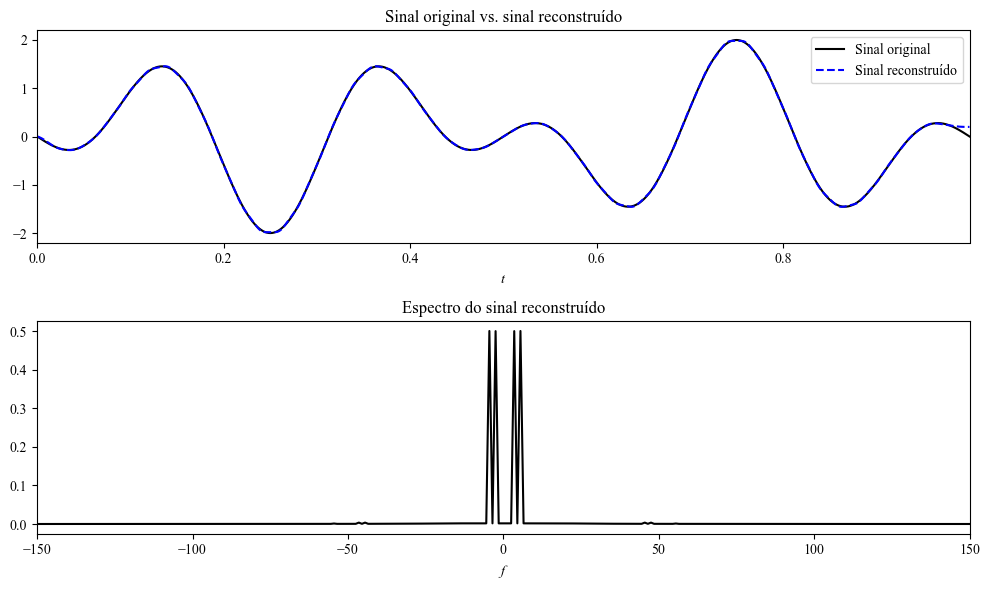

In [4]:
#Filtro Passa-Baixas
Fc = Fs/2                                                # frequência de corte
ordem = 4                                              # ordem do filtro
Fd = 1/Td
Wn =  Fc / (Fd/2)                                    # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, Wn, btype='lowpass')   # cálculo dos coeficientes do filtro
g_rec_ideal = nFac*signal.filtfilt(b_lp, a_lp, gT)
f,G_rec_ideal = ctft(g_rec_ideal,Td)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,g,'k', label='Sinal original')
plt.plot(t,g_rec_ideal,'--b', label='Sinal reconstruído')
plt.xlabel('$t$')
plt.title('Sinal original vs. sinal reconstruído')
plt.xlim(min(t),max(t))
plt.legend(loc=1)

plt.subplot(2,1,2)
plt.plot(f,abs(G_rec_ideal),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro do sinal reconstruído')
plt.tight_layout()

Verifique que o sinal recuperado é idêntico ao sinal original.

<h3> 1.1 - Aliasing </h3>

O aliasing consiste na sobreposição das réplicas do espectro do sinal quando é amostrado em uma taxa inferior à Nyquist. No caso, não é possível recuperar um sinal perfeitamente a partir de suas amostras.

Quando estamos trabalhando com sinais senoidais, valem as seguintes observações para o aliasing:
* Se um sinal senoidal tem frequência $f > f_s/2$ ocorrerá \emph{aliasing};
* O aliasing se caracteriza por um sinal de alta frequência parecer com um sinal de mais baixa frequência;
* As amostras de um sinal senoidal sempre estarão na faixa fundamental de $-f_s/2$ Hz até $f_s/2$ Hz;
* Um sinal senoidal com frequência $f$ Hz amostrado com frequência $f_s$ Hz possui amostras iguais à de uma senoide com frequência $f_a$ Hz na faixa fundamental:
$$
    f_a = f - mf_s \qquad - \frac{f_s}{2} \leq f_a < \frac{f_s}{2}, m \in \Z
$$
* Se $f_a < 0$, ocorre uma inversão de fase.

Vamos verificar o aliasing em sinais senoidais. Inicialmente vamos amostrar um sinal senoidal $g(t) = \sin (2\pi f t)$ com $f = 10 Hz$. Se utilizarmos uma frequência de amostragem $f_s = 50$ Hz não ocorrerá aliasing.

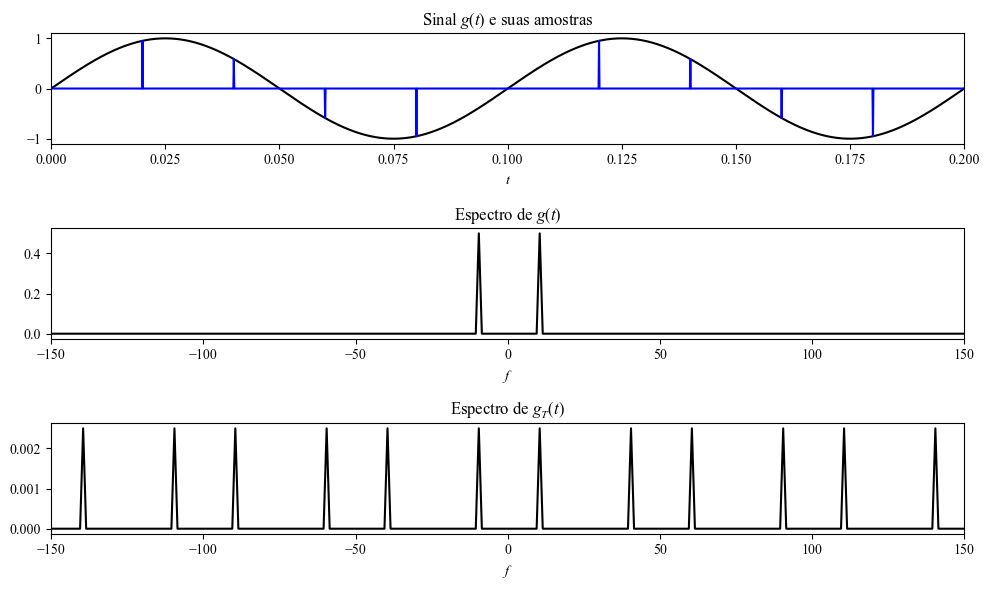

In [7]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt
#Muda a fonte dos Plots para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

Td = 1e-4
t = np.arange(0,1.0,Td)
g = np.sin(2*np.pi*10*t)
f,Gf = ctft(g,Td)

Fs = 50
Ts = 1/Fs
N = len(g)
nFac = int(np.round(Ts/Td))
gT = np.zeros(N)
gT[0::nFac] = g[0::nFac]
f,GTf = ctft(gT,Td)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t,g,'k')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$ e suas amostras')
plt.plot(t,gT,'b')
plt.xlim(0,0.2)

plt.subplot(3,1,2)
plt.plot(f,abs(Gf),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro de $g(t)$')

plt.subplot(3,1,3)
plt.plot(f,abs(GTf),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro de $g_T(t)$')

plt.tight_layout()

Aplicando o processo de recuperação, poderemos constatar isso...

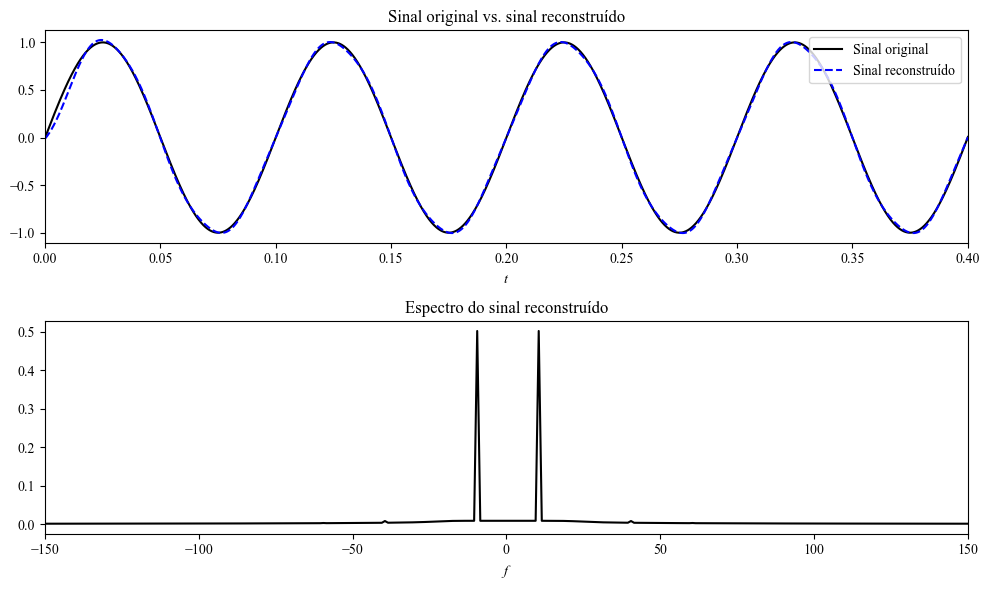

In [9]:
#Filtro Passa-Baixas
fc = Fs/2                                                # frequência de corte
ordem = 4                                              # ordem do filtro
Fd = 1/Td
Wn = fc / (Fd/2)                                    # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, Wn, btype='lowpass')   # cálculo dos coeficientes do filtro
g_rec_ideal = nFac*signal.filtfilt(b_lp, a_lp, gT)
f,G_rec_ideal = ctft(g_rec_ideal,Td)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,g,'k', label='Sinal original')
plt.plot(t,g_rec_ideal,'--b', label='Sinal reconstruído')
plt.xlim(0,0.4)
plt.xlabel('$t$')
plt.title('Sinal original vs. sinal reconstruído')
plt.legend(loc=1)

plt.subplot(2,1,2)
plt.plot(f,abs(G_rec_ideal),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro do sinal reconstruído')
plt.tight_layout()

Todavia, vamos supor a amostragem do sinal senoidal com frequência $f = 35$ Hz. Como a frequência do sinal senoidal é superior à $f_s/2 = 25$ Hz, ocorrerá aliasing e o sinal recuperado aparentará uma frequência menor do que o sinal original.

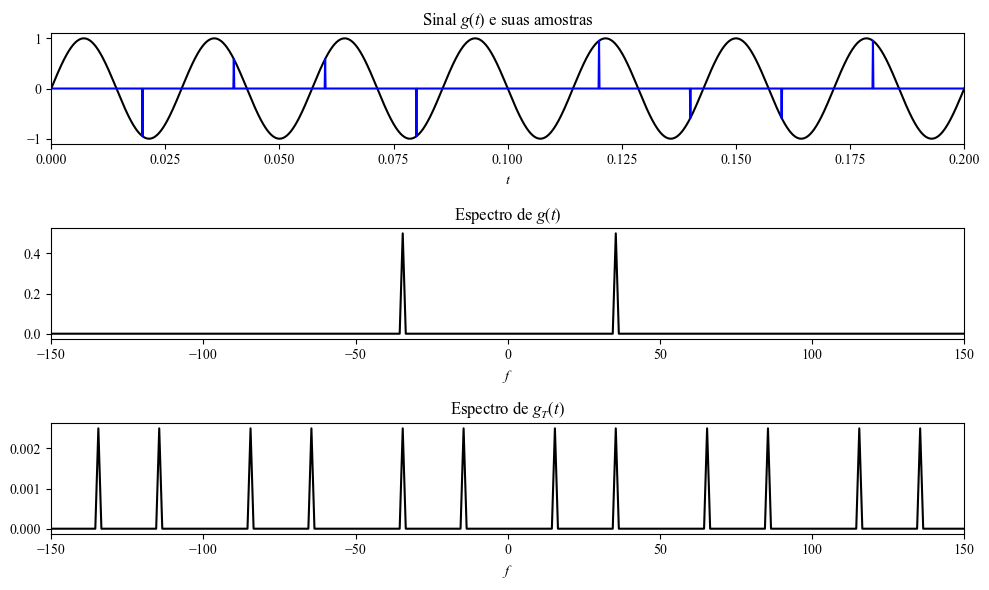

In [10]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt
#Muda a fonte dos Plots para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

Td = 1e-4
t = np.arange(0,1.0,Td)
Ta = 0.3
g = np.sin(2*np.pi*35*t)
f,Gf = ctft(g,Td)

Fs = 50
Ts = 1/Fs
N = len(g)
nFac = int(np.round(Ts/Td))
gT = np.zeros(N)
gT[0::nFac] = g[0::nFac]
f,GTf = ctft(gT,Td)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t,g,'k')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$ e suas amostras')
plt.plot(t,gT,'b')
plt.xlim(0,0.2)

plt.subplot(3,1,2)
plt.plot(f,abs(Gf),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro de $g(t)$')

plt.subplot(3,1,3)
plt.plot(f,abs(GTf),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro de $g_T(t)$')

plt.tight_layout()

Vamos agora aplicar a recuperação do sinal...

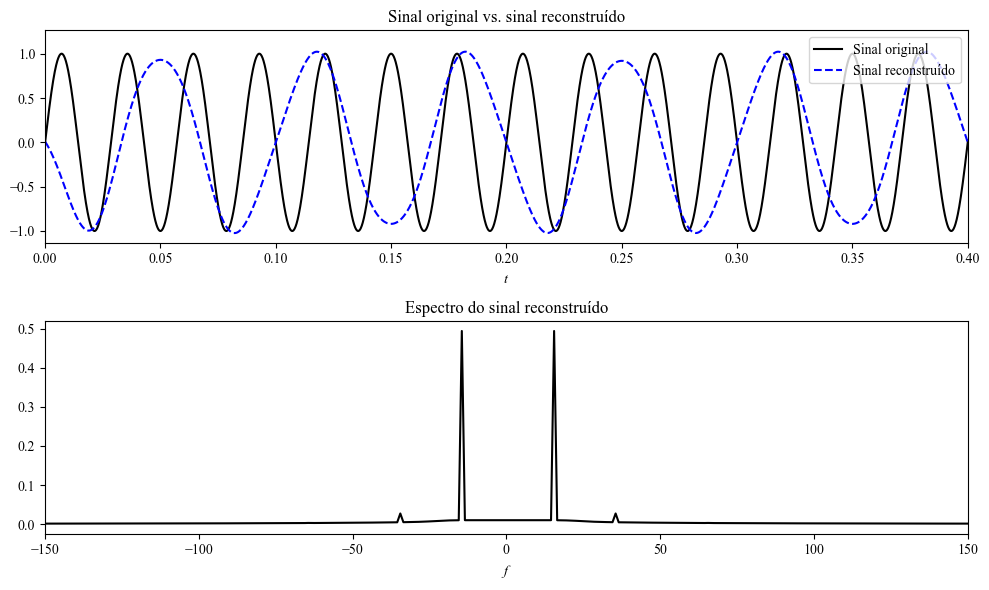

In [12]:
#Filtro Passa-Baixas
fc = Fs/2                                                # frequência de corte
ordem = 4                                              # ordem do filtro
Fd = 1/Td
Wn = fc / (Fd/2)                                    # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, Wn, btype='lowpass')   # cálculo dos coeficientes do filtro
g_rec_ideal = nFac*signal.filtfilt(b_lp, a_lp, gT)
f,G_rec_ideal = ctft(g_rec_ideal,Td)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,g,'k', label='Sinal original')
plt.plot(t,g_rec_ideal,'--b', label='Sinal reconstruído')
plt.xlim(0,0.4)
plt.xlabel('$t$')
plt.title('Sinal original vs. sinal reconstruído')
plt.legend(loc=1)

plt.subplot(2,1,2)
plt.plot(f,abs(G_rec_ideal),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro do sinal reconstruído')
plt.tight_layout()

Note que o sinal recuperado aparenta uma frequência menor do que o sinal original. Isso ocorreu devido ao aliasing.

<h2> 2. Interpolação Prática </h2>

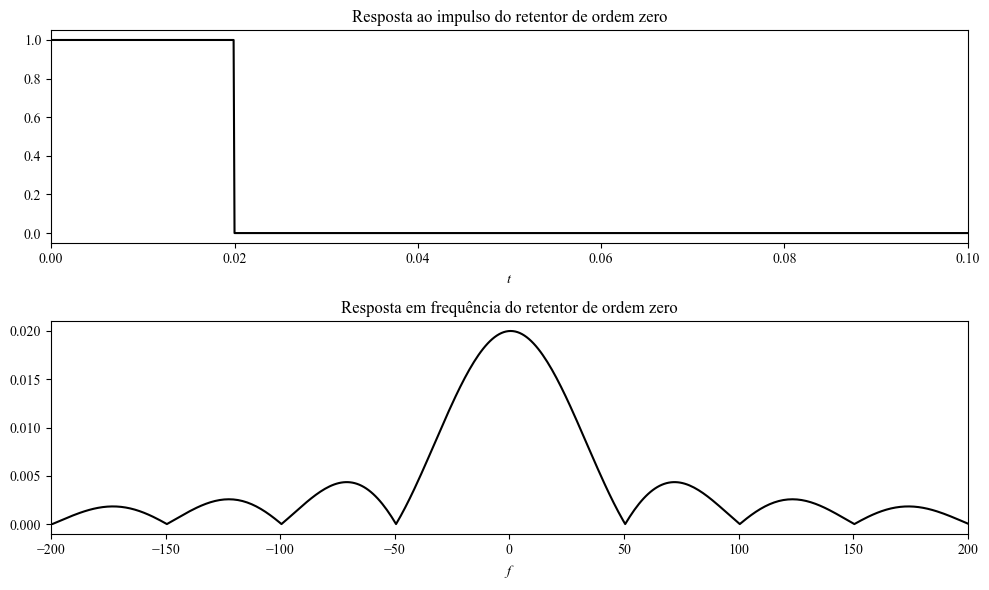

In [82]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt
#Muda a fonte dos Plots para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para Calcular a Transformada de Fourier
def ctfs(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

Td = 1e-4
t = np.arange(0,1.0,Td)

#Retentor de Ordem Zero
Fs = 50
Ts = 1/Fs
nFac = int(np.round(Ts/Td))
hZOH = np.zeros_like(t)
hZOH[0:nFac] = 1
f, Hf_zoh = ctfs(hZOH,Td)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,hZOH,'k')
plt.xlabel('$t$')
plt.title('Resposta ao impulso do retentor de ordem zero')
plt.xlim(0,5*Ts)
plt.subplot(2,1,2)
plt.plot(f,np.abs(Hf_zoh),'k')
plt.xlabel('$f$')
plt.title('Resposta em frequência do retentor de ordem zero')
plt.xlim(-200,200)
plt.tight_layout()

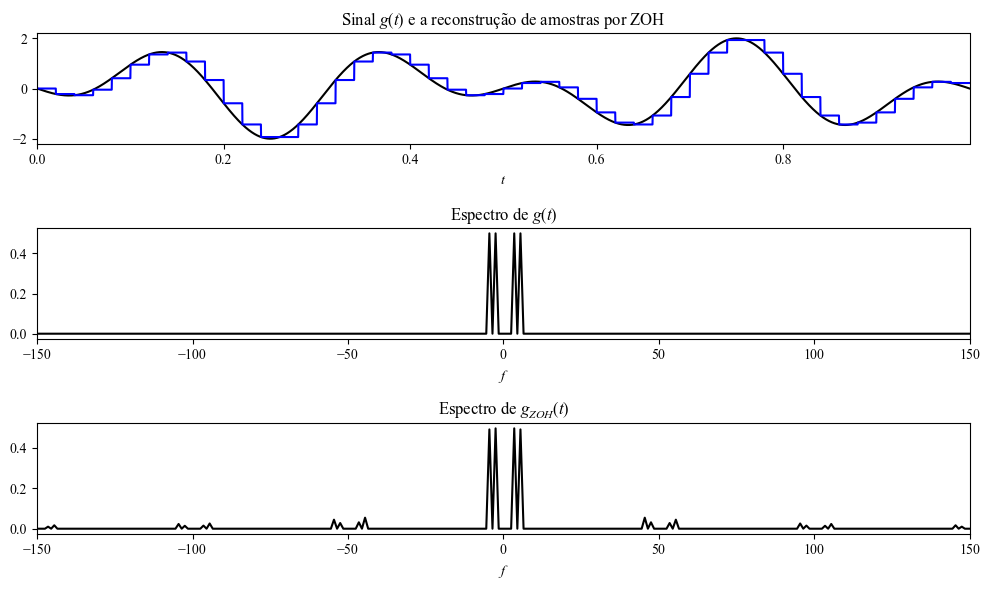

In [84]:
g = np.sin(2*np.pi*3*t) - np.sin(2*np.pi*5*t)
f,Gf = ctfs(g,Td)

gT = np.zeros_like(g)
gT[0::nFac] = g[0::nFac]

g_zoh_temp = np.convolve(gT,hZOH)
Nconv = int(len(g_zoh_temp)/2) + 1
g_zoh = np.zeros(Nconv)
g_zoh = g_zoh_temp[0:Nconv]
f,G_zoh_f = ctfs(g_zoh,Td)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t,g,'k')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$ e a reconstrução de amostras por ZOH')
plt.plot(t,g_zoh,'b')
plt.xlim(min(t),max(t))

plt.subplot(3,1,2)
plt.plot(f,abs(Gf),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro de $g(t)$')

plt.subplot(3,1,3)
plt.plot(f,abs(G_zoh_f),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro de $g_{ZOH}(t)$')

plt.tight_layout()


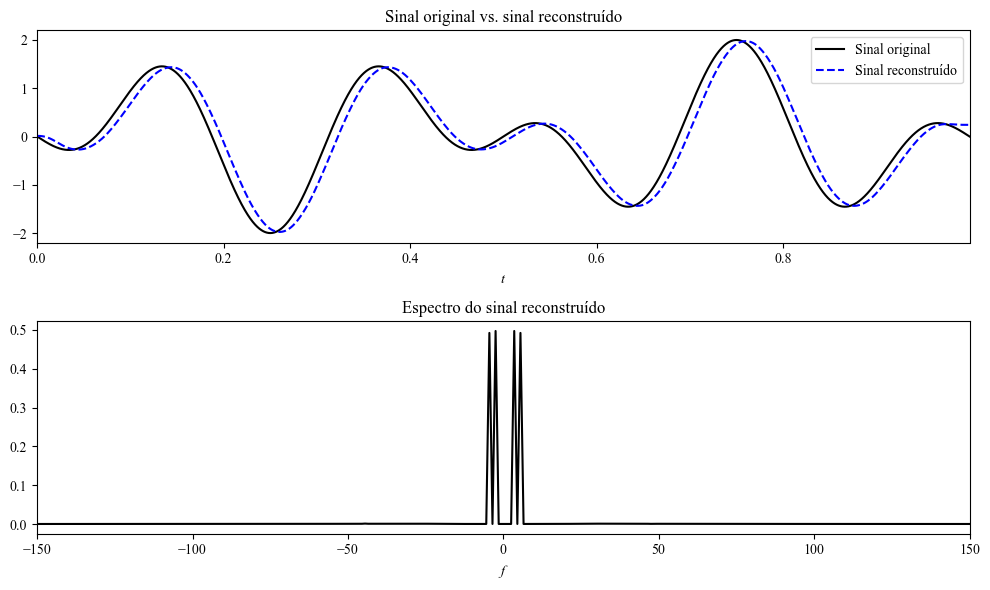

In [85]:
#Filtro Passa-Baixas
W = Fs/2                                                # frequência de corte
ordem = 4                                               # ordem do filtro
Fd = 1/Td
fc_norm = W / (Fd/2)                                    # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, fc_norm, btype='lowpass')   # cálculo dos coeficientes do filtro

g_rec_zoh = signal.filtfilt(b_lp, a_lp, g_zoh)
f,G_rec_zoh = ctfs(g_rec_zoh,Td)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,g,'k', label='Sinal original')
plt.plot(t,g_rec_zoh,'--b', label='Sinal reconstruído')
plt.xlabel('$t$')
plt.title('Sinal original vs. sinal reconstruído')
plt.xlim(min(t),max(t))
plt.legend(loc=1)

plt.subplot(2,1,2)
plt.plot(f,abs(G_rec_zoh),'k')
plt.xlim(-150,150)
plt.xlabel('$f$')
plt.title('Espectro do sinal reconstruído')
plt.tight_layout()

<h2> 3. Quantização e Conversão Analógico-Digital </h2>

SQNR (PCM 16 níveis) =  23.395752110297714
SQNR (PCM 8 níveis) =  16.87904937950193
SQNR (PCM 4 níveis) =  7.638392175884067


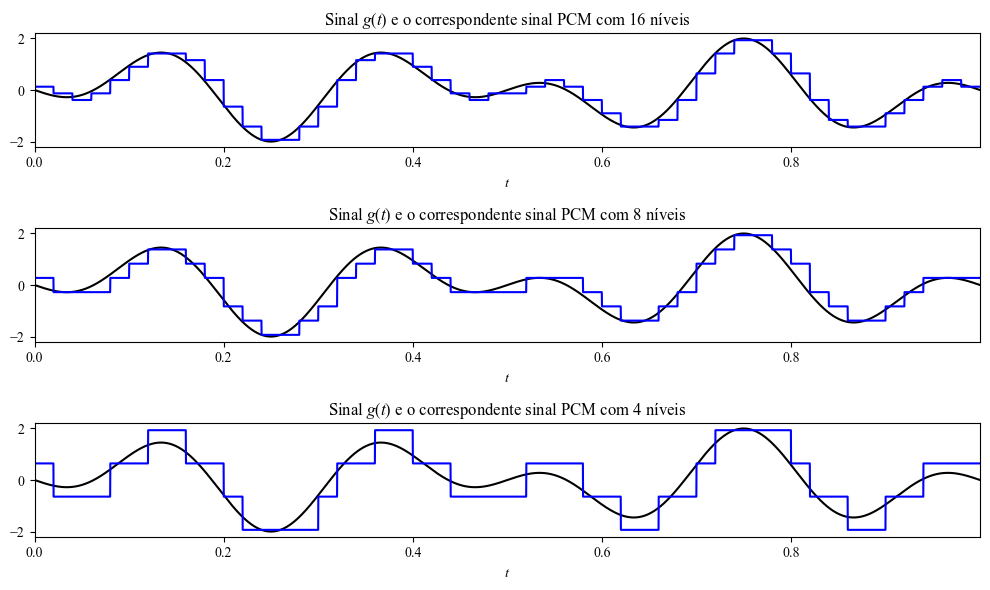

In [90]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt
#Muda a fonte dos Plots para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para Calcular a Transformada de Fourier
def ctfs(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Funcao para fazer a quantizacao
def uniquan(x, L):
    x_max = max(x)
    x_min = min(x)
    q_level = np.linspace(x_min, x_max, L)
    a_p = (L-1)/(x_max - x_min)
    b_p = -a_p*x_min
    x_p = np.round((a_p*x + b_p)).astype(int)
    x_pcm = q_level[x_p]
    SQNR = 20*np.log10(np.linalg.norm(x)/np.linalg.norm(x - x_pcm))
    return x_pcm, SQNR

Td = 1e-4
t = np.arange(0,1.0,Td)

#Retentor de Ordem Zero
Fs = 50
Ts = 1/Fs
nFac = int(np.round(Ts/Td))
hZOH = np.zeros_like(t)
hZOH[0:nFac] = 1

g = np.sin(2*np.pi*3*t) - np.sin(2*np.pi*5*t)
f,Gf = ctfs(g,Td)

gT = np.zeros_like(g)
gT[0::nFac] = g[0::nFac]

g_zoh_temp = np.convolve(gT,hZOH)
Nconv = int(len(g_zoh_temp)/2) + 1
g_zoh = np.zeros(Nconv)
g_zoh = g_zoh_temp[0:Nconv]

[g_pcm_16, SQNR16] = uniquan(g_zoh, 16)
[g_pcm_8, SQNR8]  = uniquan(g_zoh, 8)
[g_pcm_4, SQNR4]  = uniquan(g_zoh, 4)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t,g,'k')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$ e o correspondente sinal PCM com 16 níveis')
plt.plot(t,g_pcm_16,'-b')
plt.xlim(min(t),max(t))

plt.subplot(3,1,2)
plt.plot(t,g,'k')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$ e o correspondente sinal PCM com 8 níveis')
plt.plot(t,g_pcm_8,'-b')
plt.xlim(min(t),max(t))

plt.subplot(3,1,3)
plt.plot(t,g,'k')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$ e o correspondente sinal PCM com 4 níveis')
plt.plot(t,g_pcm_4,'-b')
plt.xlim(min(t),max(t))

plt.tight_layout()

print('SQNR (PCM 16 níveis) = ', SQNR16)
print('SQNR (PCM 8 níveis) = ', SQNR8)
print('SQNR (PCM 4 níveis) = ', SQNR4)


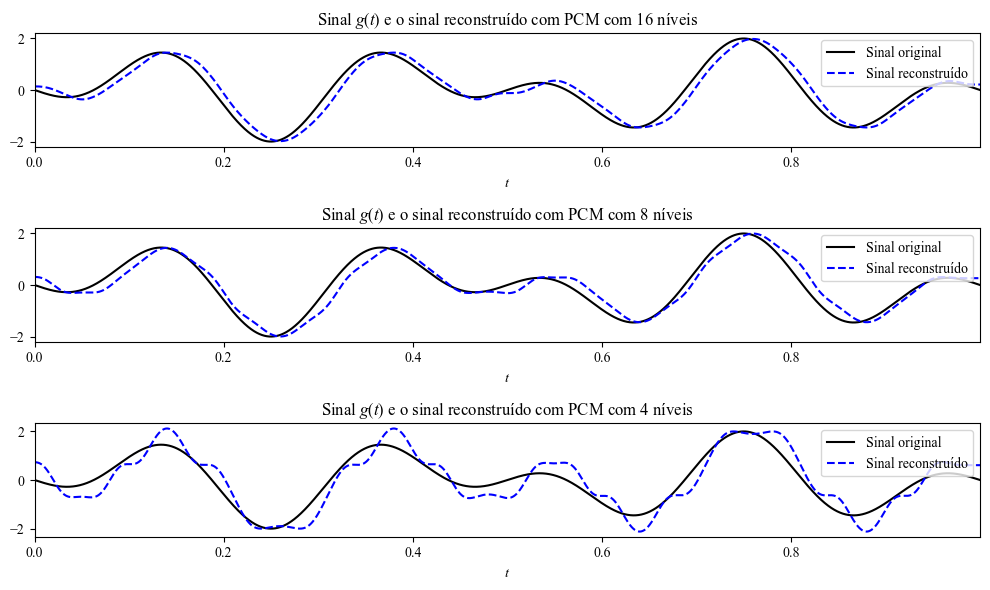

In [94]:
#Filtro Passa-Baixas
W = Fs/2                                                # frequência de corte
ordem = 4                                               # ordem do filtro
Fd = 1/Td
fc_norm = W / (Fd/2)                                    # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, fc_norm, btype='lowpass')   # cálculo dos coeficientes do filtro

g_rec_pcm_16 = signal.filtfilt(b_lp, a_lp, g_pcm_16)
g_rec_pcm_8 = signal.filtfilt(b_lp, a_lp, g_pcm_8)
g_rec_pcm_4 = signal.filtfilt(b_lp, a_lp, g_pcm_4)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t,g,'k', label='Sinal original')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$ e o sinal reconstruído com PCM com 16 níveis')
plt.plot(t,g_rec_pcm_16,'--b', label='Sinal reconstruído')
plt.xlim(min(t),max(t))
plt.legend(loc=1)

plt.subplot(3,1,2)
plt.plot(t,g,'k', label='Sinal original')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$ e o sinal reconstruído com PCM com 8 níveis')
plt.plot(t,g_rec_pcm_8,'--b', label='Sinal reconstruído')
plt.xlim(min(t),max(t))
plt.legend(loc=1)

plt.subplot(3,1,3)
plt.plot(t,g,'k', label='Sinal original')
plt.xlabel('$t$')
plt.title('Sinal $g(t)$ e o sinal reconstruído com PCM com 4 níveis')
plt.plot(t,g_rec_pcm_4,'--b', label='Sinal reconstruído')
plt.xlim(min(t),max(t))
plt.legend(loc=1)

plt.tight_layout()